# Water Quality Model

The water quality model employs supervised machine learning techniques to classify water as potable (1) or not potable (0), making this a binary classification problem since the output variable is categorical. Supervised learning is a type of machine learning where the model is trained on labeled data. In this context, "labeled data" means that each training example is paired with an output label. The goal of the model is to learn the mapping from inputs to outputs based on the provided labels. 

## Data

The data is stored in a CSV file located in the `data` folder under the name `water_potability.csv`. This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv

The first task involves performing Exploratory Data Analysis (EDA) to identify any discrepancies in the dataset, normalize the data, and visualize it effectively.

In [2]:
# import modules needed

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# read csv file and print the first 10 rows
data = pd.read_csv('data/water_potability.csv')
print(data.head(5))

# Number of rows and columns in entire dataset
print(f'Data has {data.shape[0]} rows and {data.shape[1]} columns')

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Data has 3276 rows and 10 columns


### Check for the availability and number of NaN values in the dataset

## Why is it important
There are two main reasons why checking for NaN (Not a Number) values is crucial during data preprocessing:

Maintaining Model Stability: Many machine learning algorithms rely on mathematical operations that can't handle NaN values. For instance, dividing by a NaN value would result in an error or unexpected output. By identifying and addressing NaN values, you ensure the smooth operation of these algorithms and prevent errors during training and prediction.

Preserving Data Integrity: NaN values represent missing data points. If left unchecked, they can skew your analysis and lead to inaccurate or misleading results.  Understanding the presence and distribution of NaN values allows you to make informed decisions about how to handle them. You might choose to remove rows with NaN values, impute them with estimated values, or create a separate category for them.

In [4]:
# check for Nan Values in each column
nan_counts = data.isnull().sum()

print(f'Nan Values in each column: {nan_counts}')

Nan Values in each column: ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


From the information above the columns ph, sulfate and Trihalomethanes both have a good number of NaN Values. 

### Replace NaN values with the mean of the column

In [6]:
# Replace NaN values in 'sulfate' and 'Trihalomethanes' with the mean of the respective column
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

print("NaN values after replacement:")
print(data.isnull().sum())

NaN values after replacement:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [8]:
# Validate that the data has no NaN Values
print(data.head(5))

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [9]:
# Separate our data to X -> Feature Columms and Y -> Output Label
X = data.iloc[:, 0:9]
Y = data['Potability']

# Display first few rows of X and Y to verify
print(f'X features: {X.head()}')
print(f'Y target: {Y.head()}')

X features:          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075  
Y target: 0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64


## Normalize the Data

`Why Normalize?`

- Consistent Scale: Ensures all features contribute equally to the model.
- Improved Performance: Helps gradient-based algorithms converge faster.
-Prevent Bias: Avoids models being biased towards features with larger scales.

`Standard Scaler`

Standard Scaler normalization is a technique used to transform the features of a dataset so that they have a mean of 0 and a standard deviation of 1. This is also known as standardization or Z-score normalization. Formula:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- \( z \) is the standardized value.
- \( x \) is the original value.
- \( \mu \) is the mean of the dataset.
- \( \sigma \) is the standard deviation of the dataset.

`Why Standard Scaler?`

- Standardization: Transforms features to have a mean of 0 and a standard deviation of 1.
- Robust to Different Ranges: Handles features with varying ranges effectively.
- Suitable for Normal Distribution: Aligns well with algorithms assuming normally distributed data.

In [12]:
scaler = StandardScaler()

def normalize_data(X):
    '''
    Normalizes a data
    '''
    normalized_data = scaler.fit_transform(X)
    
    return normalized_data 

X_normalized = normalize_data(X)
print(type(X_normalized))
print(X_normalized[0:3])

<class 'numpy.ndarray'>
[[-6.04313345e-16  2.59194711e-01 -1.39470871e-01  1.12414846e-01
   9.61357416e-01  1.70895423e+00 -1.18065057e+00  1.30614943e+00
  -1.28629758e+00]
 [-2.28933938e+00 -2.03641367e+00 -3.85986650e-01 -3.07693708e-01
   3.14598714e-15  2.06257500e+00  2.70597240e-01 -6.38479983e-01
   6.84217891e-01]
 [ 6.92867789e-01  8.47664833e-01 -2.40047337e-01  1.36059386e+00
   3.14598714e-15 -9.40321148e-02  7.81116857e-01  1.50940884e-03
  -1.16736546e+00]]


### Split the data into training and testing

In [18]:
X = X_normalized

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1)


## Building a Neural Network for Binary Classification using tensorflow

In the next cell, we define a function neural_net that constructs and compiles a neural network model using the TensorFlow Keras API. The function takes an optional parameter regularizer, which allows us to apply regularization to the Dense layers in the network. 

In [31]:
def neural_net(regularizer=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (9,)),
        tf.keras.layers.Dense(250, activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.Dense(125, activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.Dense(2, activation="softmax")
    ])
    loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
    model.compile(optimizer = 'adam',
              loss = loss_function,
              metrics = ['accuracy'])
    
    return model

### Create an instance of our neural network with no regularization

In [32]:
unregularized_model = neural_net()
unregularized_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 250)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 125)            │        31,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,127 (133.31 KB)

 Trainable params: 34,127 (133.31 KB)

 Non-trainable params: 0 (0.00 B)

### Fit the training data to the Unregularized model

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6265 - loss: 0.6622 - val_accuracy: 0.6235 - val_loss: 0.6395
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6786 - loss: 0.6071 - val_accuracy: 0.6402 - val_loss: 0.6127
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6990 - loss: 0.5877 - val_accuracy: 0.6585 - val_loss: 0.6050
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7027 - loss: 0.5791 - val_accuracy: 0.6479 - val_loss: 0.6120
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - loss: 0.5788 - val_accuracy: 0.6433 - val_loss: 0.6192
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6996 - loss: 0.5677 - val_accuracy: 0.6601 - val_loss: 0.5986
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7258 - loss: 0.5397 - val_accuracy: 0.6677 - val_loss: 0.6075
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7251 - loss: 0.5457 - val_accuracy: 0.6753 - v

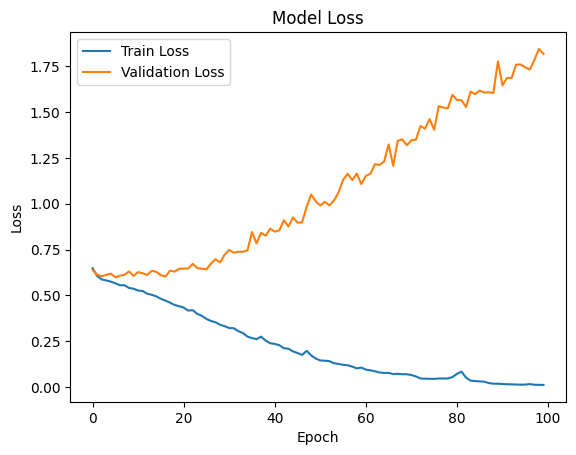

In [33]:
history = unregularized_model.fit(X_train, Y_train, epochs = 100, validation_data=(X_val, Y_val))

# plot training vs Validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Create a regularized model that uses L2 Regularization and train the model with X_test, Y_test

In [25]:
regularizer = tf.keras.regularizers.l2(0.0001)
reg_model = neural_net(regularizer)

reg_model.fit(X_train, Y_train, epochs = 100, validation_data=(X_val, Y_val))

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5477 - loss: 0.7206 - val_accuracy: 0.5507 - val_loss: 0.7222
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5995 - loss: 0.6958 - val_accuracy: 0.5983 - val_loss: 0.7032
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5963 - loss: 0.6935 - val_accuracy: 0.5702 - val_loss: 0.7053
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6021 - loss: 0.6789 - val_accuracy: 0.5714 - val_loss: 0.7262
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6253 - loss: 0.6855 - val_accuracy: 0.5946 - val_loss: 0.7011
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.6634 - val_accuracy: 0.6142 - val_loss: 0.6831
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - loss: 0.6601 - val_accuracy: 0.6105 - val_loss: 0.6787
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6655 - loss: 0.6380 - val_accuracy: 0.6227 - v

### Implement Dropout in confluence with L2 Regularization

Our model currently has an accuracy of 89.14% and a loss of 0.34 on the training data and 64.96% accuracy and a loss of 0.86, suggesting a possible case of `Overfitting`. Now let's try to implement early stopping.

In [34]:
# Define the neural network model with L2 regularization and Dropout
def neural_net_with_dropout(regularizer=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(9,)),
        tf.keras.layers.Dense(500, activation="sigmoid", kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(250, activation="sigmoid", kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2, activation="softmax")
    ])
    loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
    model.compile(optimizer='SGD',
                  loss=loss_function,
                  metrics=['accuracy'])
    return model

regularizer = tf.keras.regularizers.l(0.0001)
dropout_model = neural_net_with_dropout(regularizer)

# Train the model with the EarlyStopping callback
dropout_model.fit(
    X_train, Y_train, 
    epochs=100, 
    validation_data=(X_val, Y_val)
)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5386 - loss: 1.3039 - val_accuracy: 0.5800 - val_loss: 1.2656
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5665 - loss: 1.2905 - val_accuracy: 0.5800 - val_loss: 1.2654
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5872 - loss: 1.2982 - val_accuracy: 0.5800 - val_loss: 1.2621
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5753 - loss: 1.2881 - val_accuracy: 0.5800 - val_loss: 1.2616
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6008 - loss: 1.2624 - val_accuracy: 0.5800 - val_loss: 1.2619
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5979 - loss: 1.2683 - val_accuracy: 0.5800 - val_loss: 1.2679
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5735 - loss: 1.2740 - val_accuracy: 0.5800 - val_loss: 1.2598
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6029 - loss: 1.2471 - val_accuracy: 0.5800 - val_loss: 1.2